In [1]:
!pip install sounddevice

                                              0.0/199.7 kB ? eta -:--:--
     -------------------------------------- 199.7/199.7 kB 6.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install --upgrade pip


                                              0.0/2.1 MB ? eta -:--:--
     -------                                  0.4/2.1 MB 11.6 MB/s eta 0:00:01
     ------------------                       0.9/2.1 MB 11.8 MB/s eta 0:00:01
     --------------------------------         1.7/2.1 MB 11.8 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.1
    Uninstalling pip-23.1.1:
      Successfully uninstalled pip-23.1.1


In [4]:
import math
import random
import numpy as np
import pandas as pd
import sounddevice as sd
import matplotlib.pyplot as plt

# 2. Gradiente Descendiente

Se crea el algoritmo del Gradiente Descendiente, en una función, modificando un poco la del ejemplo del punto 2.

In [40]:
def y_predict(a, b, c, d, x):
    return a * np.sin(b * x + c) + d

def gradienteDecendiente(x, y):
    lr = 0.01
    n = len(x)
    batch = 500
    epochs = [1000, 2000]
    rsl = []
    a = random.random()
    b = random.random()
    c = random.random()
    d = 0
    
    for epoch in epochs:
        for i in range(epoch):
            a_gradiente = 0
            b_gradiente = 0
            c_gradiente = 0
            d_gradiente = 0
            e = 0

            for m in range(batch):
                ix = int(random.uniform(0, n))
                y_pred = y_predict(a, b, c, d, x[ix])
                error = y[ix] - y_pred

                e += error**2
                a_gradiente += 2 * error * np.sin(b * x[ix] + c)
                b_gradiente += 2 * error * a * np.cos(b * x[ix] + c) * x[ix]
                c_gradiente += 2 * error * a * np.cos(b * x[ix] + c)
                d_gradiente += 2 * error

            a = a - lr * a_gradiente / batch
            b = b - lr * b_gradiente / batch
            c = c - lr * c_gradiente / batch

            e /= batch
            rsl.append([a,b,c,e])
            print(f"error: {e} period: {b} amplitude: {a}  constant: {c}")

    return rsl, a, b, c

In [41]:
data = pd.read_csv('data/senal.csv')

Cargamos los datos a la varibles x, y

In [42]:
x = data['x'].values
y = data['y'].values

In [43]:
resultados, a, b, c = gradienteDecendiente(x, y)

error: 4.961133360405733 period: 0.7065210902068789 amplitude: 0.7825274180599335  constant: 0.3760061127642239
error: 5.089080498814469 period: 0.7115296162000949 amplitude: 0.8030950423051894  constant: 0.3776649397528058
error: 5.294034676380616 period: 0.714953782774164 amplitude: 0.8272400278398168  constant: 0.3787018146902953
error: 5.422465250644407 period: 0.7183447207670416 amplitude: 0.8507783373443213  constant: 0.3794256265534885
error: 5.435885380254466 period: 0.7212077841357145 amplitude: 0.8749218034723213  constant: 0.3798806701643488
error: 5.573621395308537 period: 0.7241169632194416 amplitude: 0.9005778763252456  constant: 0.3805620908311976
error: 5.354627678882199 period: 0.7282048434723805 amplitude: 0.9258216548879069  constant: 0.3821624186355127
error: 5.1518064516013675 period: 0.7293351951612831 amplitude: 0.9492645874854906  constant: 0.381689366730953
error: 5.4099036314708995 period: 0.7321894746410271 amplitude: 0.9721174037821011  constant: 0.381888872

error: 23.321179040560324 period: 0.5647946447354877 amplitude: 7.598542836397828  constant: 1.0380429902576638
error: 58.646568279480675 period: -0.055249453630455414 amplitude: 7.732902914663915  constant: 0.7020945237443517
error: 25.742225342170908 period: 0.8369717816864538 amplitude: 7.786718783584392  constant: 1.2871545126539536
error: 27.461597449857074 period: 0.3551009000454861 amplitude: 7.84263162471624  constant: 0.9030361037528968
error: 68.14673288828595 period: 0.45115153139023384 amplitude: 7.999929872660662  constant: 1.024670468255244
error: 66.14840380575492 period: 0.015101108356404547 amplitude: 8.151188805829307  constant: 0.8302297076183807
error: 48.7820878643724 period: 1.1663694475966864 amplitude: 8.2523894063484  constant: 1.5483552796049485
error: 24.339029610577466 period: 1.4440937748299683 amplitude: 8.304916074391144  constant: 1.5779861220384412
error: 33.03306429377855 period: 1.453689533595895 amplitude: 8.383352110414675  constant: 1.5901080363216

error: 175.5973390724327 period: 3.2105198545903892 amplitude: 18.20782819973369  constant: 1.5499840333935957
error: 191.04129710669113 period: 3.29010006434803 amplitude: 18.405608031580734  constant: 1.872011619396927
error: 209.10785215216802 period: 3.6234643858782203 amplitude: 18.609801975194557  constant: 2.0967093246677915
error: 240.24015174328508 period: 3.808261855319284 amplitude: 18.83565399330084  constant: 2.0678956174016716
error: 251.1374761779779 period: 3.6995005294953547 amplitude: 19.07070172585892  constant: 1.8588563156739684
error: 255.28758096942877 period: 4.337632811169776 amplitude: 19.30660589288647  constant: 2.0844442575774322
error: 208.92572413947644 period: 3.0978927124548603 amplitude: 19.50689310432399  constant: 1.3120943547183601
error: 203.23705236058117 period: 3.8055605739509453 amplitude: 19.712234472440947  constant: 2.1033039975990553
error: 260.6124387139487 period: 3.7163225846034016 amplitude: 19.946382339434727  constant: 1.9805362482714

error: 979.9573774452832 period: -16.585279821696027 amplitude: 44.38630151931479  constant: -10.270934324598425
error: 973.4631732169906 period: -17.008349611072248 amplitude: 44.8244474286858  constant: -9.782177792928684
error: 1077.2244265562938 period: -16.725431477925746 amplitude: 45.29894417347601  constant: -9.22087127098139
error: 1049.494599358188 period: -17.169694873370688 amplitude: 45.759563646942496  constant: -9.410668441316785
error: 1083.6021334987752 period: -16.93803235153064 amplitude: 46.22910498439969  constant: -9.096073013085526
error: 1070.5197307234157 period: -16.62469928533519 amplitude: 46.68926006873098  constant: -8.795448573498788
error: 1090.8439579443757 period: -16.24230790431084 amplitude: 47.15288617288052  constant: -8.503722240462697
error: 1098.5138997999995 period: -17.752912538234042 amplitude: 47.61901105694173  constant: -9.423759854909937
error: 1161.9542068335504 period: -17.759339068400948 amplitude: 48.10252413000351  constant: -8.86403

error: 19413.223828277718 period: -213.45950718092152 amplitude: 195.44113135798534  constant: -123.08467291204255
error: 18719.784360126156 period: -203.70978423680234 amplitude: 197.3591243383867  constant: -116.6922381408748
error: 19648.541339482606 period: -176.6077467556696 amplitude: 199.35139394052717  constant: -100.95385756048684
error: 19839.342202843512 period: -177.2607359147095 amplitude: 201.3399675707128  constant: -103.91413002287035
error: 20763.14288611008 period: -208.91490552823467 amplitude: 203.40293090398154  constant: -119.41578913830497
error: 20684.679509260484 period: -186.94779328168664 amplitude: 205.43670520928345  constant: -104.93225608924304
error: 21677.830681659154 period: -221.62719711999284 amplitude: 207.5456135469232  constant: -122.89905877215753
error: 21632.951548521218 period: -210.4830347113044 amplitude: 209.6318259928557  constant: -119.17592416184564
error: 21893.08954489141 period: -177.7727702306579 amplitude: 211.72157332252831  consta

error: 214076.66496847576 period: 1595.9303060689363 amplitude: 658.2179060592339  constant: 1051.484300546046
error: 222961.01251373568 period: 1455.5284213006357 amplitude: 664.9916497542245  constant: 954.1622780140159
error: 222885.30693145725 period: 1903.6425451389366 amplitude: 671.6944129064312  constant: 1170.037717811275
error: 223780.88800977168 period: 2132.3892596134124 amplitude: 678.3582699503685  constant: 1311.2044149898024
error: 233206.95728855353 period: 2161.9090555828716 amplitude: 685.2353287547327  constant: 1264.5279199141962
error: 227071.97988043402 period: 2196.3880479637733 amplitude: 691.8607000990309  constant: 1221.1212541154787
error: 245653.61102012274 period: 2443.783602258544 amplitude: 698.961887890546  constant: 1456.2191826389683
error: 246692.40132783962 period: 2636.5429923032757 amplitude: 706.0183529501105  constant: 1606.6145547413932
error: 249863.65249760717 period: 2317.302322808117 amplitude: 713.0953109676972  constant: 1365.731871446609

error: 952675.9357027092 period: -11913.483266057436 amplitude: 1405.4470664154778  constant: -8578.88437964722
error: 912659.1199925933 period: -10303.23148176446 amplitude: 1418.4351601923713  constant: -7422.66699632295
error: 1018883.2252126249 period: -12798.07884923655 amplitude: 1432.8016099830436  constant: -8738.127992227519
error: 1026729.100871315 period: -14376.702525303852 amplitude: 1447.1335104028897  constant: -9322.795124317854
error: 1040215.7504569822 period: -14859.12750370747 amplitude: 1461.5102172573747  constant: -9380.279465467544
error: 1028583.252856964 period: -14433.573518055775 amplitude: 1475.5856403505095  constant: -9357.338757271416
error: 1038352.0498803408 period: -14539.084077323518 amplitude: 1489.6579292941005  constant: -9331.02449994832
error: 1112521.406044226 period: -15049.614522736138 amplitude: 1504.5928015591824  constant: -9745.454731021317
error: 1157255.4117179473 period: -16258.763147222082 amplitude: 1519.9751782372662  constant: -107

error: 5076208.513943518 period: -24234.299187432527 amplitude: 3183.2336990541335  constant: -13540.500121827155
error: 5271217.060297676 period: -26726.155501368135 amplitude: 3216.353218966038  constant: -16995.034255027964
error: 4625295.916272268 period: -24555.962155358367 amplitude: 3245.1159773188588  constant: -16224.903501553625
error: 5366902.87357567 period: -29055.277284786767 amplitude: 3278.19180793057  constant: -19307.242977259397
error: 5600150.406079966 period: -20630.48705514807 amplitude: 3312.356334913843  constant: -16527.64235118718
error: 5616367.3491293695 period: -17095.551891495637 amplitude: 3346.26807384439  constant: -13750.19965234698
error: 5500031.616956622 period: -25156.453895015897 amplitude: 3379.140813654018  constant: -17776.69416660922
error: 5636629.719640499 period: -31814.224502697914 amplitude: 3412.50185634198  constant: -23144.66377983726
error: 5638199.557466755 period: -37591.203852748346 amplitude: 3445.544196763931  constant: -28419.36

error: 25567893.07251322 period: 148234.60491934497 amplitude: 7283.289587148387  constant: 90369.42991116013
error: 27541268.535614345 period: 125721.7195127308 amplitude: 7358.9204753057975  constant: 77753.70680692061
error: 27332989.154298738 period: 174737.50769795754 amplitude: 7433.206107822858  constant: 102475.79599453672
error: 28723818.486438412 period: 164308.946598045 amplitude: 7510.490643893597  constant: 84106.58428417146
error: 29505301.179012105 period: 171367.99990400474 amplitude: 7589.0633247662445  constant: 88035.2952806344
error: 28718776.593600743 period: 135868.45051506287 amplitude: 7664.749035810501  constant: 74847.10927511558
error: 27856036.538435176 period: 150558.72836068596 amplitude: 7737.43280162277  constant: 92957.06260406371
error: 32000111.718978625 period: 159101.74741504094 amplitude: 7820.147389827429  constant: 95339.84023405358
error: 30703729.028049666 period: 217532.75689382327 amplitude: 7898.673523283405  constant: 131954.47983205732
err

error: 142913536.53967875 period: -518280.04759889777 amplitude: 17037.518570564942  constant: -307135.0158601104
error: 143878503.79437226 period: -606006.7423154352 amplitude: 17206.413953203453  constant: -287437.4001343813
error: 145201261.73818758 period: -587141.1620591559 amplitude: 17375.18781124824  constant: -285814.53010594414
error: 158011018.13372752 period: -357348.4196103413 amplitude: 17557.06817292398  constant: -132790.23737080494
error: 156007969.13321286 period: -316302.45391132886 amplitude: 17734.78366435286  constant: -117598.97529380125
error: 161661342.6523246 period: -604160.2706759085 amplitude: 17917.093757861356  constant: -254457.6976985632
error: 166662824.61334154 period: -682687.2265242441 amplitude: 18103.133493249254  constant: -306792.7886480562
error: 173815573.04128948 period: -626216.856417375 amplitude: 18295.162290263783  constant: -216038.49735266546
error: 164784033.64962456 period: -637133.1382197108 amplitude: 18475.302171593223  constant: -

error: 724081475.5320979 period: -1714259.7367027577 amplitude: 39395.01858369775  constant: -29549.41640323763
error: 757843570.4636984 period: -1550152.923443695 amplitude: 39779.75965830773  constant: 369961.92189709726
error: 781832242.0333462 period: -1885878.1936690856 amplitude: 40172.84167395152  constant: 74438.87451193068
error: 798139053.1009464 period: -2771516.7096796506 amplitude: 40570.19543090114  constant: -664882.0973358676
error: 841101326.9817207 period: -2172182.447315102 amplitude: 40984.83573399396  constant: -303255.59200490714
error: 840478198.7764915 period: -2678391.8522510766 amplitude: 41394.97865764006  constant: -416139.3970754064
error: 820765346.8118088 period: -2357762.0412251316 amplitude: 41791.52930490193  constant: -308861.1503091324
error: 811760164.9885061 period: -2411330.40741193 amplitude: 42180.01017562089  constant: -66756.58626267963
error: 847801164.3637491 period: -2195999.899858895 amplitude: 42582.002042511616  constant: 13708.133142761

error: 3955529983.157046 period: 50586885.28211658 amplitude: 89636.48643626925  constant: 41103622.39477444
error: 4101476000.5792594 period: 61703467.302184105 amplitude: 90551.62297942444  constant: 44892197.34222222
error: 3447216246.8895674 period: 49961270.24472063 amplitude: 91313.0043636028  constant: 37961992.19926161
error: 4232281686.6294804 period: 52785648.31811309 amplitude: 92239.99001476972  constant: 38875590.339114025
error: 4244896368.580811 period: 49984585.635221094 amplitude: 93160.39556554126  constant: 37967965.89159735
error: 4328358746.859968 period: 50331588.38576363 amplitude: 94089.62419991822  constant: 39055607.78404876
error: 4541183304.077034 period: 52062924.587605186 amplitude: 95054.91317611917  constant: 40360944.5616457
error: 4846184158.449109 period: 56975369.49293064 amplitude: 96074.57394630442  constant: 42664216.16431533
error: 5091509568.87868 period: 49944039.870465755 amplitude: 97134.48333161324  constant: 36778827.570470646
error: 476507

error: 20288583994.22846 period: 49061505.49875072 amplitude: 201197.29349350458  constant: 52292454.8227959
error: 19675204828.796875 period: 58510019.90169078 amplitude: 203153.10662423456  constant: 59457793.18126733
error: 20278575113.11251 period: 50588453.957333274 amplitude: 205149.48827613462  constant: 57979601.20129743
error: 20806356256.712116 period: 58136178.03944297 amplitude: 207177.89696692786  constant: 58527380.566491865
error: 21835516845.411907 period: 54688008.48953534 amplitude: 209285.79949113357  constant: 45738690.68111822
error: 21676770854.14255 period: 42091149.59128336 amplitude: 211357.29878481544  constant: 38162595.35637001
error: 22207068277.727337 period: 57532613.45422075 amplitude: 213458.67393119403  constant: 44382955.21273131
error: 21770872466.001217 period: 42671624.615966454 amplitude: 215498.49466722945  constant: 36741464.18254264
error: 23246340431.407936 period: 99021203.03330746 amplitude: 217655.94318182103  constant: 72923590.02018255
er

error: 99925542468.93025 period: 171432888.17759898 amplitude: 446499.78734643984  constant: 16254472.892719828
error: 96356807268.39952 period: 90380104.1891456 amplitude: 450815.88406389364  constant: -68972214.15596575
error: 104115031306.12552 period: 110523016.17387523 amplitude: 455434.84420643986  constant: -79806430.78046505
error: 106119403858.59543 period: -141773891.032026 amplitude: 460094.9806237814  constant: -210041395.04007322
error: 105366707082.04993 period: -400354544.9317875 amplitude: 464675.19674378255  constant: -368649364.52126884
error: 104659359444.78123 period: -432837579.28672856 amplitude: 469179.81978177547  constant: -393569233.3156359
error: 110631120529.82841 period: -448815676.0238837 amplitude: 473895.7556759124  constant: -421197854.0834893
error: 112716020946.78847 period: -323507999.6811836 amplitude: 478652.75340381707  constant: -356315972.0145902
error: 113010319487.6214 period: -278669952.8170664 amplitude: 483374.77062305226  constant: -338572

error: 480759180787.77966 period: -1272348515.6640365 amplitude: 972003.4725551541  constant: -816685484.005281
error: 490032697396.80457 period: -1412573706.8801022 amplitude: 982086.4127841978  constant: -948765105.0394143
error: 476164570077.9515 period: -1065306650.0954418 amplitude: 991783.4129136305  constant: -808526757.5686467
error: 503150398765.73303 period: -543266375.0578026 amplitude: 1001929.7906401902  constant: -414783864.2578077
error: 481546808147.024 period: -1105555472.8909817 amplitude: 1011542.1762802338  constant: -825781080.9610958
error: 509967043801.90796 period: -1168528187.4185336 amplitude: 1021625.1385411816  constant: -784375451.6484357
error: 535455746569.89685 period: -169799710.7040974 amplitude: 1032107.5710676776  constant: -120466768.45140779
error: 541370443118.67523 period: 47626662.561694056 amplitude: 1042598.1538074195  constant: 66809146.115130275
error: 557090588046.9512 period: 30071229.983492114 amplitude: 1053284.7369676945  constant: 8348

error: 2246160771928.655 period: 8583505269.81456 amplitude: 2106023.1520418986  constant: 2202510312.112493
error: 2388789012416.083 period: 8272013625.579925 amplitude: 2128708.4570153044  constant: 2137209029.228077
error: 2248155631696.321 period: 6592450676.220607 amplitude: 2149830.7069136295  constant: 1653424664.1633217
error: 2373327008902.1646 period: 6745829317.372014 amplitude: 2171909.905967025  constant: 2195768465.286914
error: 2349333421280.1396 period: 10078304122.151983 amplitude: 2193543.70823045  constant: 4142310322.42202
error: 2437234088073.775 period: 15273966805.298756 amplitude: 2215765.594936102  constant: 6787377957.775827
error: 2446407986261.1816 period: 14978267806.059963 amplitude: 2237847.4275897252  constant: 7140017366.181529
error: 2492646830540.1357 period: 16223158433.365295 amplitude: 2260124.612024782  constant: 8652011553.574179
error: 2606096593618.361 period: 19633511771.440315 amplitude: 2283186.1415681248  constant: 9002487326.797565
error: 

error: 51405394192353.49 period: 134330807258.91998 amplitude: 10132481.70717421  constant: 132004435272.6878
error: 50123906041131.79 period: 113542794897.59874 amplitude: 10231418.782737419  constant: 145391229843.25897
error: 50182998191735.13 period: 113586705265.15959 amplitude: 10329514.656683806  constant: 136936907024.32338
error: 53991330317037.0 period: 160286222342.07324 amplitude: 10434052.637160076  constant: 164018378276.29742
error: 52875697681273.49 period: 44151562182.92502 amplitude: 10535404.816142086  constant: 107696531615.47208
error: 55731871207743.71 period: -48840711354.06947 amplitude: 10641204.017151916  constant: 63516262652.82446
error: 54949969320912.945 period: -213653504927.42383 amplitude: 10744481.746711336  constant: -46756274650.50314
error: 59598903448007.48 period: -283433820847.08203 amplitude: 10855420.375836506  constant: -87699452326.18356
error: 60063531115407.766 period: -340287396294.7751 amplitude: 10966081.278538706  constant: -13693677389

error: 288307273478925.3 period: 369991252007.7502 amplitude: 23656469.73034459  constant: 461820439563.9033
error: 288052892095631.06 period: -272474587643.6397 amplitude: 23899999.634716704  constant: 18210391205.60388
error: 289493155267565.44 period: -153675291823.64758 amplitude: 24142253.324581545  constant: 86253567711.86081
error: 284483608695080.5 period: -255285228028.03787 amplitude: 24377926.114430316  constant: 34573910520.138985
error: 297025899831267.5 period: -259807673116.60968 amplitude: 24621610.42022069  constant: -49718285832.20333
error: 300982956554191.5 period: -609035685282.9597 amplitude: 24866097.23927791  constant: -353148276895.2132
error: 308715349332554.7 period: -332534916195.8378 amplitude: 25114399.447909683  constant: -123255749233.73746
error: 305718778564765.0 period: -363501006788.11426 amplitude: 25357860.401165374  constant: -142513989221.71625
error: 311034346524700.06 period: 76154726013.432 amplitude: 25603176.3254985  constant: 149014588828.5

error: 1591189902919997.5 period: -1932471119492.8994 amplitude: 58113560.03660414  constant: -2259276555367.4224
error: 1676758816827418.2 period: -4510391181469.666 amplitude: 58690622.8838519  constant: -3352562613488.255
error: 1725041471660312.2 period: -7171143517776.267 amplitude: 59278465.162757084  constant: -4917208877228.159
error: 1715675851913582.8 period: -7966685064155.703 amplitude: 59857318.15856023  constant: -5174059246226.103
error: 1797262436365206.8 period: -4838431328709.103 amplitude: 60457833.68036432  constant: -2827348021481.408
error: 1777647075167666.2 period: -5784758299282.471 amplitude: 61045895.46510356  constant: -3310794105655.6216
error: 1824638393329552.5 period: -3877586095629.762 amplitude: 61643687.79229899  constant: -1501234211613.494
error: 1925747984969343.0 period: -5682165143299.903 amplitude: 62268487.52223279  constant: -2677166075580.293
error: 1877371001835060.8 period: -7485599384714.378 amplitude: 62871479.84562914  constant: -3708644

error: 8730215750967494.0 period: -7935120482544.277 amplitude: 132401272.99489672  constant: 12037985512076.09
error: 8706322864672610.0 period: -13856710548463.7 amplitude: 133716414.86071268  constant: 9078370468316.691
error: 9414201491573780.0 period: -21519203944574.31 amplitude: 135124499.50072438  constant: 2333184397028.6846
error: 9317163525410184.0 period: -15152899802659.812 amplitude: 136503548.23868564  constant: 6497982221745.865
error: 9361690789621198.0 period: -13411515946876.277 amplitude: 137875188.8904257  constant: 7623751965875.743
error: 9387760112729470.0 period: -22837539010785.92 amplitude: 139236965.46334103  constant: 1856638037805.9922
error: 9777951882642660.0 period: -33998954667635.47 amplitude: 140641470.62946728  constant: -6434178644639.169
error: 9961314565496364.0 period: -38366675837697.625 amplitude: 142058025.01191026  constant: -9440459376456.238
error: 1.0042438453732968e+16 period: -20924885163640.99 amplitude: 143471875.22746786  constant: 3

error: 1.9927284260268634e+17 period: 607832475095088.2 amplitude: 621225315.606569  constant: 456894557897942.9
error: 1.783284989950104e+17 period: 879842162077405.2 amplitude: 626966501.4367388  constant: 680389426843708.2
error: 1.9582501417366506e+17 period: 859864526945672.2 amplitude: 633213247.1163683  constant: 707534524317697.6
error: 2.026525827274605e+17 period: 669449605354169.1 amplitude: 639614016.0094541  constant: 676792942804844.2
error: 2.0252123310250554e+17 period: 596343268618408.1 amplitude: 645946623.7385226  constant: 625427606338499.0
error: 2.179566987004653e+17 period: 564066641719063.6 amplitude: 652695066.7428023  constant: 506595510153351.9
error: 2.215846574701413e+17 period: 490144603297063.9 amplitude: 659484903.7965918  constant: 515360931317613.75
error: 2.2212803097757264e+17 period: 571891640842397.8 amplitude: 666221313.6731108  constant: 582255237516214.6
error: 2.087202073261058e+17 period: 176643974530939.8 amplitude: 672487105.6269176  constan

error: 9.042700920237116e+17 period: 1.4428065034891196e+16 amplitude: 1319083622.0701134  constant: 1.003611642526457e+16
error: 8.824062837027432e+17 period: 1.3613649543405852e+16 amplitude: 1332462702.3492143  constant: 9879202686427344.0
error: 9.241394604075082e+17 period: 1.0820101616911072e+16 amplitude: 1346333851.7438624  constant: 8242818258944356.0
error: 8.918446129822185e+17 period: 9851402633897254.0 amplitude: 1359582342.996507  constant: 7702108022641848.0
error: 8.819217948952988e+17 period: 1.0419898556223294e+16 amplitude: 1372555765.3050156  constant: 8021738657787492.0
error: 9.555431588314134e+17 period: 1.169138376309942e+16 amplitude: 1386479325.763434  constant: 8731832361209138.0
error: 9.856688671424282e+17 period: 1.1395503729954122e+16 amplitude: 1400697624.566912  constant: 8566400766616327.0
error: 9.517851825714836e+17 period: 1.403824117188163e+16 amplitude: 1414287783.7243965  constant: 9686647166795354.0
error: 9.19311931082875e+17 period: 1.72391460

error: 4.870612080790655e+18 period: -1.4982746425927824e+16 amplitude: 3141761266.0569463  constant: -4323176317350378.5
error: 4.640126261402175e+18 period: -9670670159888012.0 amplitude: 3171299641.9445796  constant: -2400236304569351.0
error: 5.295221839356032e+18 period: -9847621967849604.0 amplitude: 3204694290.429024  constant: -147857175887645.5
error: 5.485485511954026e+18 period: -7385223546054150.0 amplitude: 3238928354.6822705  constant: -1255395116206196.2
error: 5.442169244976668e+18 period: -1.4523399432662924e+16 amplitude: 3272533106.927797  constant: -6744235274950935.0
error: 5.455082101930712e+18 period: -1.4396189861720292e+16 amplitude: 3305871697.6971545  constant: -5347644934228002.0
error: 5.527394107224324e+18 period: -1.5630859362458086e+16 amplitude: 3339311556.3052816  constant: -5645918334201500.0
error: 5.708907353523202e+18 period: -2.297041553358511e+16 amplitude: 3373503677.986929  constant: -9315715772489960.0
error: 5.395288478143319e+18 period: -2.4

error: 2.5388827878895653e+19 period: -2.1052141065242816e+16 amplitude: 7252170144.987509  constant: -5.718726150531368e+16
error: 2.735303119555655e+19 period: 2.370256936681012e+16 amplitude: 7327604203.065431  constant: -2.966111800137652e+16
error: 2.6696763682838614e+19 period: 4.754157712039351e+16 amplitude: 7400470484.985105  constant: -1.2472224197434982e+16
error: 2.856834503225452e+19 period: 2.2120584881043212e+16 amplitude: 7477677319.578756  constant: -2.6549686590780504e+16
error: 2.7725392268111487e+19 period: -8319650771569344.0 amplitude: 7551832411.0128975  constant: -4.345083956104456e+16
error: 2.7666116979639976e+19 period: 430985587175840.0 amplitude: 7625102355.243745  constant: -3.904924865480719e+16
error: 2.8503683985672466e+19 period: 3874498209667055.0 amplitude: 7699865112.9294  constant: -4.168342483478733e+16
error: 3.0084343906172924e+19 period: -1074047060358996.0 amplitude: 7778007634.817129  constant: -4.5209905728342344e+16
error: 3.189465188643783

error: 1.2908036005630081e+20 period: -4.7244115957182106e+17 amplitude: 16387455393.052673  constant: -2.9647256636480294e+17
error: 1.3265987930089844e+20 period: -4.749282829560288e+17 amplitude: 16549359576.611408  constant: -3.1080096123652845e+17
error: 1.2489235772707334e+20 period: -4.7180060444970995e+17 amplitude: 16700292737.679018  constant: -3.4192883914928256e+17
error: 1.4751425191052567e+20 period: -6.23315226248634e+17 amplitude: 16876953415.701155  constant: -4.275745866476592e+17
error: 1.413956223891661e+20 period: -2.357045653840544e+17 amplitude: 17044514016.130903  constant: -1.7149880349506838e+17
error: 1.4132703636010459e+20 period: -1.2044861354896672e+17 amplitude: 17210346889.07331  constant: -1.1784003708725126e+17
error: 1.4222975867713448e+20 period: -3.6161975150937024e+17 amplitude: 17375630900.596725  constant: -2.9516546912281024e+17
error: 1.5187394583987752e+20 period: -4.3121598295624557e+17 amplitude: 17550443483.471004  constant: -3.344848301673

error: 6.690154097267607e+20 period: -4.885244352477256e+18 amplitude: 37184719370.27047  constant: -3.671478516782511e+18
error: 6.757269564004729e+20 period: -5.060983871177942e+18 amplitude: 37548162724.33947  constant: -3.853103394020782e+18
error: 7.079185536879269e+20 period: -5.575734416300482e+18 amplitude: 37925234997.56073  constant: -4.0788552924390917e+18
error: 6.672338798655594e+20 period: -5.29080287411228e+18 amplitude: 38277103024.170296  constant: -4.1696495392085315e+18
error: 7.091690833571993e+20 period: -5.051279413574895e+18 amplitude: 38647647828.93859  constant: -3.86656582717169e+18
error: 7.465467247398012e+20 period: -6.178221720261661e+18 amplitude: 39033982711.74635  constant: -4.5121423796864236e+18
error: 8.222934847301596e+20 period: -6.653976843477205e+18 amplitude: 39455304558.81546  constant: -5.024945575777642e+18
error: 7.631089512606648e+20 period: -7.6942737087537e+18 amplitude: 39842126538.67072  constant: -5.741150027559406e+18
error: 8.1559494

error: 8.628958691836695e+21 period: -3.728176783531827e+17 amplitude: 131808692427.92723  constant: 3.220532867550079e+18
error: 8.052302513002607e+21 period: -1.3166046673487354e+19 amplitude: 133030509041.79297  constant: -3.8705904606574e+18
error: 8.609224838501064e+21 period: -2.1098776596165427e+19 amplitude: 134324832411.74939  constant: -8.388975608002984e+18
error: 9.171258166199728e+21 period: -3.644929654761355e+19 amplitude: 135690366691.82985  constant: -1.909367261280563e+19
error: 9.673446059450617e+21 period: -3.481869177258105e+19 amplitude: 137116178456.55396  constant: -1.9957596843031e+19
error: 9.246839264801559e+21 period: -3.2853044784236667e+19 amplitude: 138464938226.39392  constant: -2.0731614124565307e+19
error: 9.173158078832884e+21 period: -5.0134655579848606e+19 amplitude: 139789917415.54224  constant: -2.651826338681815e+19
error: 9.889892898817677e+21 period: -5.65363635836425e+19 amplitude: 141204882540.59097  constant: -2.797145060683739e+19
error: 9.

error: 3.894542433115063e+22 period: -2.639330823120503e+20 amplitude: 282102873464.6199  constant: -1.1206197911540901e+20
error: 3.887326365843433e+22 period: -2.6175119073565422e+20 amplitude: 284858837144.1835  constant: -1.0682560770235551e+20
error: 4.265462825724591e+22 period: -2.977940685138527e+20 amplitude: 287853627734.8413  constant: -1.1606231446508528e+20
error: 4.060359943069181e+22 period: -2.9506415356056702e+20 amplitude: 290674755941.57544  constant: -1.0716896412322642e+20
error: 3.897306052468264e+22 period: -3.992302126721667e+20 amplitude: 293356313918.5276  constant: -1.5611649778625466e+20
error: 4.2156659232289965e+22 period: -3.6897104839702426e+20 amplitude: 296230406428.7028  constant: -1.4979208727244073e+20
error: 4.3943916092045285e+22 period: -3.286091651684456e+20 amplitude: 299197280533.34467  constant: -1.1693822308499857e+20
error: 4.424103487941137e+22 period: -3.655172032542113e+20 amplitude: 302154595840.5249  constant: -1.2796476870243484e+20
e

error: 1.8383871330884253e+23 period: -1.1726275610920583e+21 amplitude: 617989221414.8037  constant: -6.754154862775941e+20
error: 1.945457586946649e+23 period: -1.1527405760989544e+21 amplitude: 624285310471.1544  constant: -6.702516728244264e+20
error: 1.794461447717739e+23 period: -1.1744485581604854e+21 amplitude: 630034160933.0146  constant: -6.292125036144696e+20
error: 1.8637252300203922e+23 period: -1.6429821981358802e+21 amplitude: 635950428162.9062  constant: -8.97896795795158e+20
error: 2.0445004261460096e+23 period: -1.5124121966304483e+21 amplitude: 642380175940.7366  constant: -7.96644834282159e+20
error: 2.0916514657570622e+23 period: -1.0858436462896921e+21 amplitude: 648892367767.6221  constant: -4.984538941963508e+20
error: 2.2215472182251335e+23 period: -1.2305567979492244e+21 amplitude: 655739565634.559  constant: -6.399725926362827e+20
error: 2.1199115099995304e+23 period: -1.3846203235733815e+21 amplitude: 662205277393.0016  constant: -7.540734675669518e+20
error

error: 9.406303536714652e+23 period: 1.1643859587773812e+21 amplitude: 1371664749652.809  constant: -4.332527880681535e+20
error: 9.576629902185238e+23 period: 2.666798399077799e+21 amplitude: 1385628263557.5154  constant: 5.7425099127034315e+20
error: 8.997627779365387e+23 period: 3.599465391138399e+21 amplitude: 1398615336665.0837  constant: 1.024239346976726e+21
error: 9.703346312115601e+23 period: 2.86255236296975e+21 amplitude: 1412490983610.6582  constant: 6.015024216698035e+20
error: 1.0112307943276039e+24 period: 3.9751902134592676e+21 amplitude: 1426809387141.1748  constant: 1.1996575583635856e+21
error: 1.003449503855854e+24 period: 2.8446874226803307e+21 amplitude: 1440875029165.9517  constant: 5.094294070981448e+20
error: 1.0818347118334103e+24 period: 1.4786220120777013e+21 amplitude: 1455891386447.9517  constant: -3.910768402037194e+20
error: 1.0636895094103685e+24 period: 9.862803956960125e+20 amplitude: 1470503596112.9258  constant: -9.373979306283368e+20
error: 1.03558

error: 6.89805159851741e+24 period: -2.1925040822985687e+19 amplitude: 3775748253880.391  constant: -6.376410285781332e+21
error: 7.337381149622175e+24 period: -1.0590751245628825e+22 amplitude: 3814614092682.4434  constant: -1.27830701797568e+22
error: 7.597912820969932e+24 period: -2.5551193969565282e+22 amplitude: 3854449906404.963  constant: -2.298856198718768e+22
error: 7.394112911265216e+24 period: -2.2833237307894815e+22 amplitude: 3892816537653.5786  constant: -2.4232635301893948e+22
error: 7.61739291276934e+24 period: -2.4976649613777104e+22 amplitude: 3931952175509.0454  constant: -2.3092554031427846e+22
error: 7.643144243464875e+24 period: -2.2956017962260883e+22 amplitude: 3970829272189.2715  constant: -2.2958413746412334e+22
error: 7.948049967917603e+24 period: -1.3112466723574611e+22 amplitude: 4010861464072.1304  constant: -1.6852680571336752e+22
error: 8.290811496664494e+24 period: 1.7988840855410175e+21 amplitude: 4052203263438.332  constant: -1.0320534448112291e+22
er

error: 3.492760573974123e+25 period: -3.856568470733553e+23 amplitude: 8411014909440.438  constant: -2.355661985977588e+23
error: 3.423824099186723e+25 period: -4.368986977636142e+23 amplitude: 8492427774262.35  constant: -2.6871984668185244e+23
error: 3.393255176338237e+25 period: -3.950825524135275e+23 amplitude: 8572340262576.28  constant: -2.3418080020499213e+23
error: 3.506968091126354e+25 period: -3.461984497594596e+23 amplitude: 8654160815277.31  constant: -2.0446937950626478e+23
error: 3.763263418973262e+25 period: -3.810375768710957e+23 amplitude: 8741130851986.818  constant: -2.2986572620532633e+23
error: 3.839734067274311e+25 period: -4.3285839856742766e+23 amplitude: 8828985252802.74  constant: -2.6664018614530706e+23
error: 3.6480970542540005e+25 period: -4.969379032973411e+23 amplitude: 8911624354574.848  constant: -3.1101679398943823e+23
error: 3.914184924350446e+25 period: -5.640027292163681e+23 amplitude: 8999468832048.61  constant: -3.570181279693249e+23
error: 4.0539

error: 2.24615652341369e+26 period: -1.304149183195674e+24 amplitude: 20915201037410.41  constant: -2.2630641221988263e+23
error: 2.1283741366309334e+26 period: -1.5235292116511218e+24 amplitude: 21118725175937.598  constant: -3.863381121200876e+23
error: 2.2155780394314836e+26 period: -1.4861453181430637e+24 amplitude: 21328546367413.293  constant: -2.9178476998450625e+23
error: 2.282356568413121e+26 period: -1.610089264372931e+24 amplitude: 21542565319206.484  constant: -3.3190487051479886e+23
error: 2.3918147472294235e+26 period: -1.634998539672272e+24 amplitude: 21764620094186.973  constant: -2.7277206166294064e+23
error: 2.3648132113903195e+26 period: -1.8191820729675253e+24 amplitude: 21981928110697.855  constant: -2.9055096411280263e+23
error: 2.514133592110467e+26 period: -1.7419662645631163e+24 amplitude: 22210673612862.15  constant: -3.314291934374896e+23
error: 2.4247380132722682e+26 period: -1.8162236808890907e+24 amplitude: 22429013502550.867  constant: -2.752210363129988e

Creamos una tabla con los datos

In [45]:
tablaResultados = pd.DataFrame(resultados, columns=['error', 'period', 'amplitude','constant'])
print(tablaResultados)

             error        period     amplitude      constant
0     7.825274e-01  7.065211e-01  3.760061e-01  4.961133e+00
1     8.030950e-01  7.115296e-01  3.776649e-01  5.089080e+00
2     8.272400e-01  7.149538e-01  3.787018e-01  5.294035e+00
3     8.507783e-01  7.183447e-01  3.794256e-01  5.422465e+00
4     8.749218e-01  7.212078e-01  3.798807e-01  5.435885e+00
...            ...           ...           ...           ...
2995  2.527913e+13  5.112525e+23  1.353747e+24  3.181223e+26
2996  2.551773e+13  1.873999e+23  1.095565e+24  3.015883e+26
2997  2.576309e+13  3.455332e+23  1.184978e+24  3.130466e+26
2998  2.602420e+13  8.352255e+23  1.474202e+24  3.363489e+26
2999  2.629932e+13  1.037375e+24  1.629148e+24  3.579857e+26

[3000 rows x 4 columns]


Generamos la señal por un periodo más largo de tiempo

In [55]:
x_minimo = np.min(x)
longitudSeñal = [y_predict(a, b, c, 0, xi) for xi in np.arange(x_minimo, 20 * math.pi, 0.001).astype(np.float32)]

Señal

Text(0.5, 1.0, 'Señal')

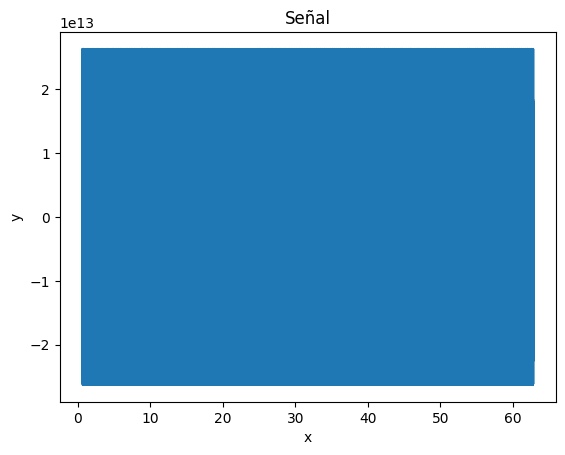

In [56]:
plt.plot(np.arange(x_minimo, 20 * math.pi, 0.001), longitudSeñal)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Señal')

Se reproduce la señal

In [52]:
sd.play(long_s)